# Centroid Based Clustering Technique on Higher Dimentionality Dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
costPerCompany = pd.read_csv('costpercompany.csv')

costPerCompany.head()

,Company,surcharges,RoR,dailycost,costwithload,costofDemand,Sales,WearandTear,Fcost
0,Yashida,2.70,9.36,222,12.1,12.9,32721,12.3,1.908
1,Wisconsin,1.20,11.80,148,59.9,3.5,7287,41.1,0.702
2,Virginia,1.07,9.30,174,54.3,5.9,10093,26.6,1.306
3,United,1.04,8.60,204,61.0,3.5,6650,0.0,2.116
4,Texas,1.16,11.70,104,54.0,-2.1,13507,0.0,0.636


In [4]:
costPerCompany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       29 non-null     object 
 1   surcharges    29 non-null     float64
 2   RoR           29 non-null     float64
 3   dailycost     29 non-null     int64  
 4   costwithload  29 non-null     float64
 5   costofDemand  29 non-null     float64
 6   Sales         29 non-null     int64  
 7   WearandTear   29 non-null     float64
 8   Fcost         29 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.2+ KB


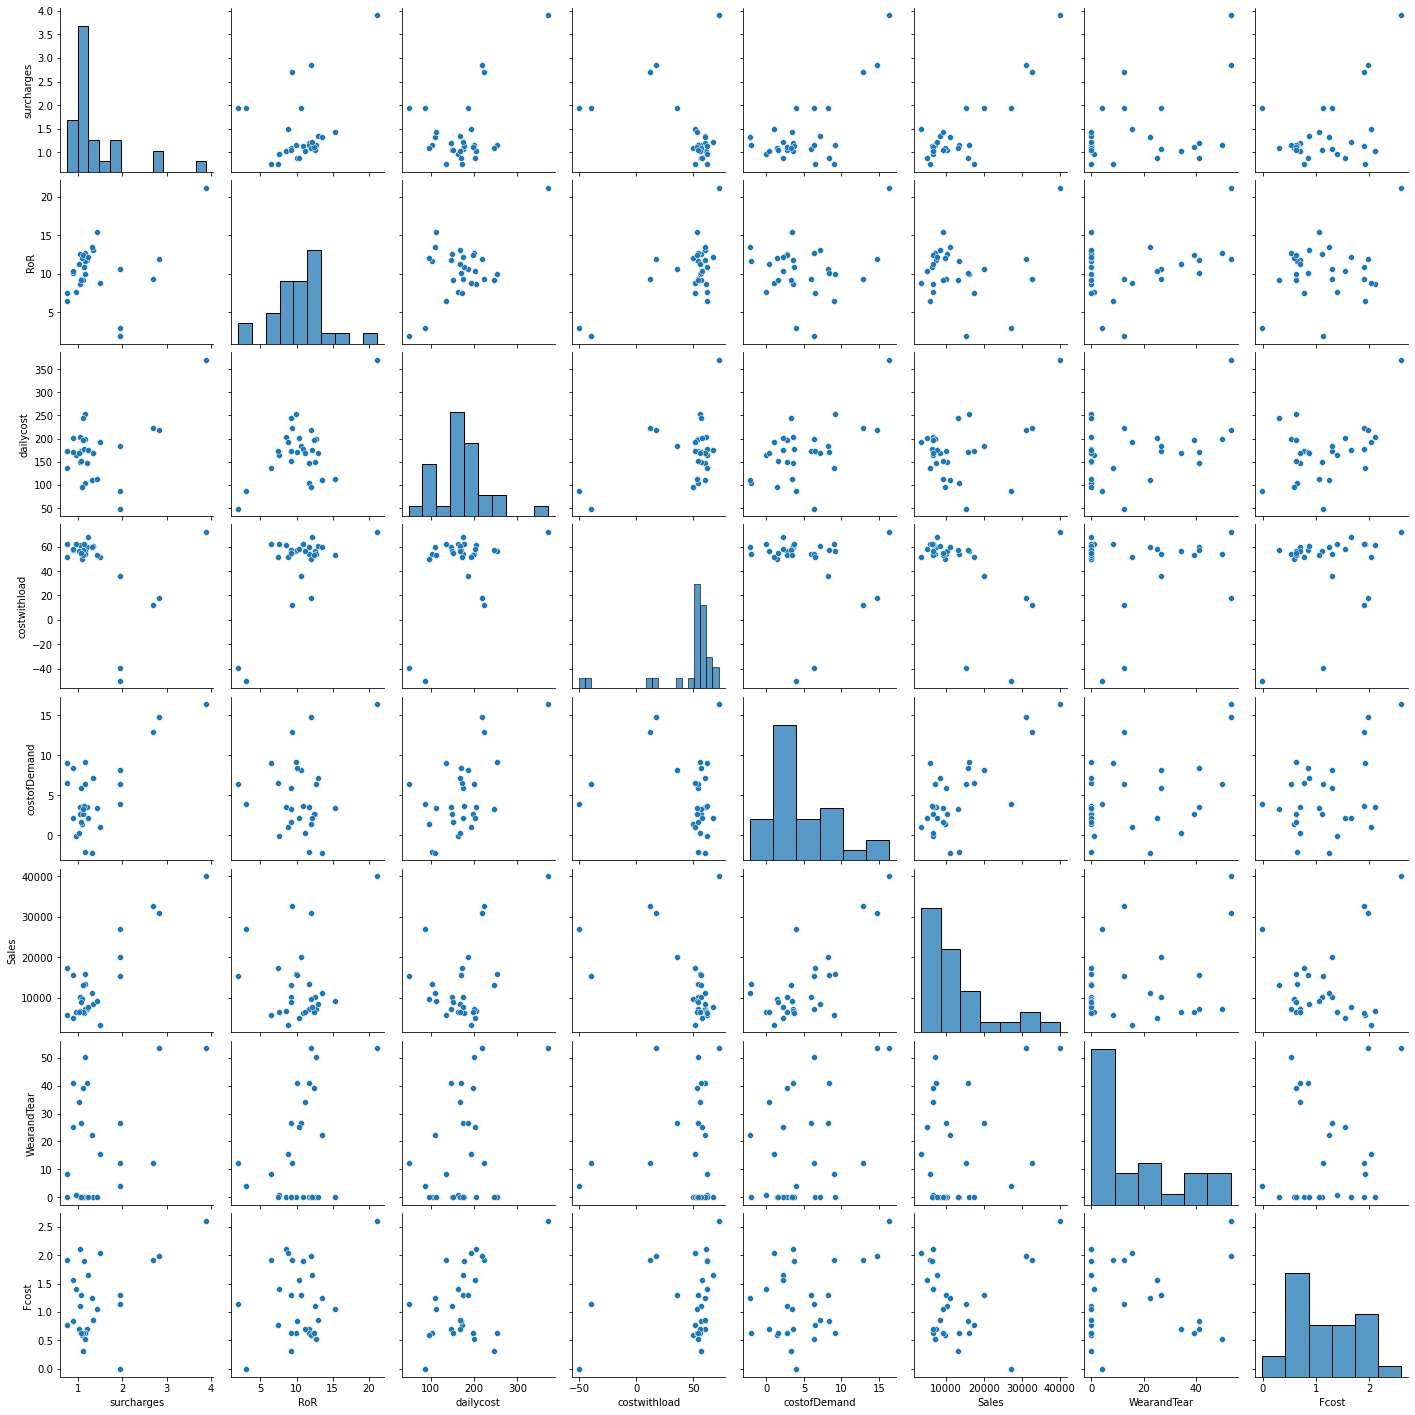

In [5]:
#Visualising the numerical columns using the pairplot function in Seaborn.

sns.pairplot(costPerCompany.iloc[:,1:])

In [6]:
#Standardize Dataset with StandardScaler

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
dataset = costPerCompany.iloc[:,1:]
scaled_dataset = scale.fit_transform(dataset)

scaled_dataset

array([[ 1.88852661, -0.32235255,  0.8332489 , -1.2515904 ,  1.77905177,
         2.19774632, -0.20533316,  1.17156669],
       [-0.29517641,  0.37433854, -0.41111585,  0.469424  , -0.31313767,
        -0.64019589,  1.34665103, -0.75238379],
       [-0.48443067, -0.3394843 ,  0.02609339,  0.26779888,  0.22103836,
        -0.32710059,  0.5652701 ,  0.21118676],
       [-0.52810473, -0.53935469,  0.53056558,  0.50902893, -0.31313767,
        -0.71127277, -0.86815974,  1.50339231],
       [-0.35340849,  0.34578563, -1.1510084 ,  0.25699753, -1.5595484 ,
         0.05383574, -0.86815974, -0.85767461],
       [-0.51354671,  0.60276185, -0.37748437,  0.35420964, -0.49119635,
        -0.3218563 , -0.86815974, -0.1046857 ],
       [ 0.7966751 ,  0.025993  ,  0.21106653, -0.3910832 ,  0.73295705,
         0.77877521,  0.57065894,  0.20959145],
       [-0.93572929, -1.16751879, -0.61290472,  0.54143297,  0.91101572,
        -0.81571225, -0.42088652,  1.19071048],
       [-0.35340849, -0.16816682

## KMeans Clustering Method

In [7]:
# KMeans is known to have a memory leak on Windows with MKL when there are less chunks than available threads. 
# Avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = "1" 

c:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


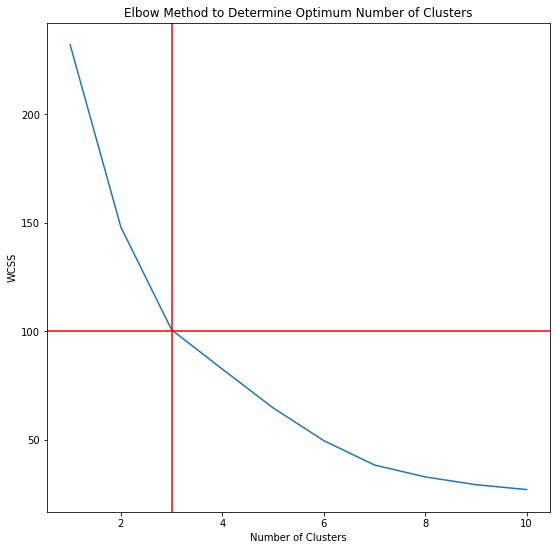

In [16]:
# Using Elbow method visualize optimum number of clusters 

from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    kmeans_values = KMeans(n_clusters= i, init="k-means++", random_state=42)
    kmeans_values.fit(scaled_dataset)
    wcss.append(kmeans_values.inertia_)

plt.figure(figsize=(9,9))
plt.plot(range(1,11), wcss)
plt.axvline(x=3, ymin=0, ymax = 300, c = 'red')
plt.axhline(y=100, xmin=0, xmax = 11, c = 'red')
plt.title("Elbow Method to Determine Optimum Number of Clusters")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.show()



In [9]:
#From Graph above we can select k = 3, Now Generate cluster assignments with k =3

kmeans_values = KMeans(n_clusters=3, init = "k-means++", random_state=42)
cluster_assignments = kmeans_values.fit_predict(scaled_dataset)

cluster_assignments

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2])

In [10]:
#We are dealing with a higher dimentionality so to visualize we reduce the Dimentionality to 2 using PCA.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaled_dataset_reduced = pca.fit_transform(scaled_dataset)
scaled_dataset_reduced

array([[ 3.12792712,  2.00450762],
       [-0.41213687, -0.68611289],
       [-0.10490735, -0.29094284],
       [-0.44743458, -0.83158055],
       [-1.7253997 , -0.08733029],
       [-0.88904159, -0.62496924],
       [ 1.35789512,  0.65919736],
       [-0.70429912, -0.12416215],
       [ 0.33848075, -0.1426528 ],
       [-1.5303248 , -0.49441696],
       [-1.65842458, -0.01174186],
       [ 4.23349282,  1.37427248],
       [ 0.31322822, -0.82619275],
       [-0.49318151, -0.96132778],
       [-0.76617688,  0.47882227],
       [ 0.33938883, -0.15141287],
       [-0.28284121, -0.90246325],
       [-0.30035625, -0.60466853],
       [-0.95052171,  4.85558529],
       [-0.66794039, -0.28870591],
       [-0.55141261, -1.16392648],
       [-0.88921471, -0.81701576],
       [-0.37704164, -0.67412769],
       [-0.91810276, -0.78315997],
       [-0.66268619, -0.60136667],
       [-0.88864395,  4.25260088],
       [ 7.49853819, -1.4085208 ],
       [-0.47116007, -1.09231009],
       [-1.51770258,

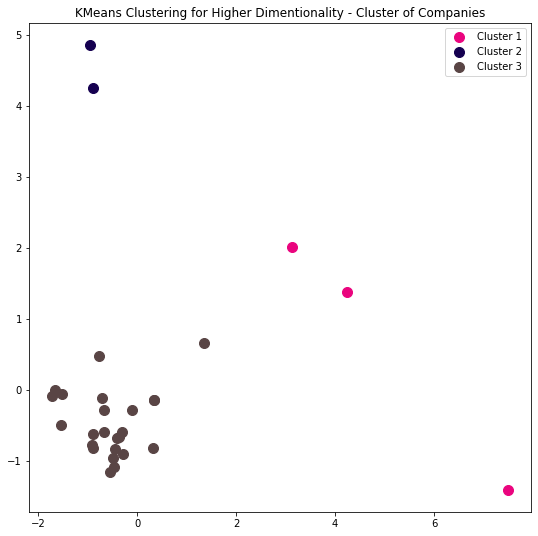

In [11]:
color = ['#EA047E', '#150050', '#594545']

plt.figure(figsize=(9,9))
for i in range(0,3):
    plt.scatter(scaled_dataset_reduced[cluster_assignments == i, 0], scaled_dataset_reduced[cluster_assignments == i, 1], s =100, c = color[i], label = 'Cluster '+str(1+i) )

plt.title("KMeans Clustering for Higher Dimentionality - Cluster of Companies")
plt.legend()
plt.show()

## Agglomerative Hierarchical Method

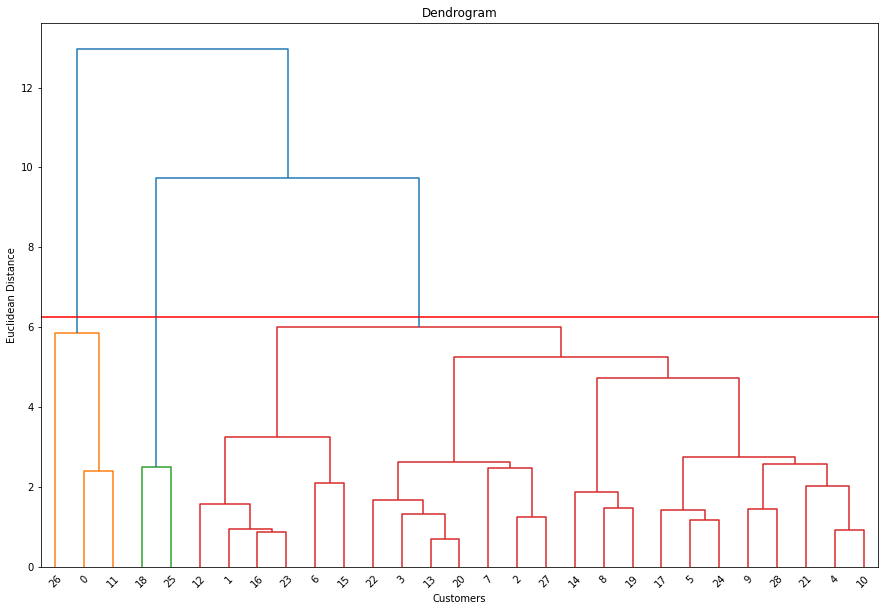

In [17]:
#Display Dendrogram.

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_dataset, method="ward"))
plt.axhline(y=6.25, c = 'red')
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()



From the dendrogram, optimum number of clusters is 3. You arrive at this number when you cut a horizontal line through the chart
at point 6.25 (Max Euclidean distance / 2). The line intersects with three vertical lines. Hence 3 clusters. 

In [13]:
# instantiate an AgglomerativeClustering object, and use the fit_predict() method on this to generate an array of cluster assignments

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters= 3, affinity="euclidean", linkage="ward")
agglo_cluster_objects = agg.fit_predict(scaled_dataset)
agglo_cluster_objects

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0], dtype=int64)

In [14]:
#Scale dataset to Two dimentionality to reduce dimentionality using PCA
from sklearn.decomposition import PCA

pca_agg =PCA(n_components=2)
scaled_dataset_reduced_agg = pca_agg.fit_transform(scaled_dataset)

scaled_dataset_reduced_agg

array([[ 3.12792712,  2.00450762],
       [-0.41213687, -0.68611289],
       [-0.10490735, -0.29094284],
       [-0.44743458, -0.83158055],
       [-1.7253997 , -0.08733029],
       [-0.88904159, -0.62496924],
       [ 1.35789512,  0.65919736],
       [-0.70429912, -0.12416215],
       [ 0.33848075, -0.1426528 ],
       [-1.5303248 , -0.49441696],
       [-1.65842458, -0.01174186],
       [ 4.23349282,  1.37427248],
       [ 0.31322822, -0.82619275],
       [-0.49318151, -0.96132778],
       [-0.76617688,  0.47882227],
       [ 0.33938883, -0.15141287],
       [-0.28284121, -0.90246325],
       [-0.30035625, -0.60466853],
       [-0.95052171,  4.85558529],
       [-0.66794039, -0.28870591],
       [-0.55141261, -1.16392648],
       [-0.88921471, -0.81701576],
       [-0.37704164, -0.67412769],
       [-0.91810276, -0.78315997],
       [-0.66268619, -0.60136667],
       [-0.88864395,  4.25260088],
       [ 7.49853819, -1.4085208 ],
       [-0.47116007, -1.09231009],
       [-1.51770258,

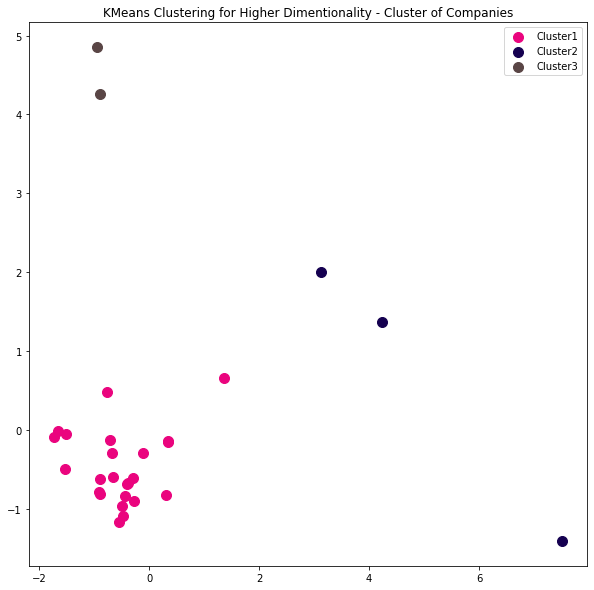

In [15]:
#Visualize on Scatter plot

from cProfile import label


plt.figure(figsize=(10,10))
for i in range(0,3):
    plt.scatter(scaled_dataset_reduced_agg[agglo_cluster_objects == i, 0], scaled_dataset_reduced_agg[agglo_cluster_objects == i, 1], s  = 100, c = color[i], label = "Cluster" + str(1+i))
plt.title("KMeans Clustering for Higher Dimentionality - Cluster of Companies")
plt.legend()
plt.show()